In [1]:
# %matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read CSV
exams = pd.read_csv('student_performance.csv')

In [3]:
# Show DF
exams.head()

,gender,ethnicity,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Reshape Data
X = exams[['gender','ethnicity','parent_edu','lunch','test_prep']]
y = exams['reading_score'].values.reshape(-1,1)
print(X.shape, y.shape)

(1000, 5) (1000, 1)


In [5]:
# Binary Encode All Data
data = X.copy()
data_binary_encoded = pd.get_dummies(data)

In [6]:
# Show Binary Data
data_binary_encoded.head()

,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parent_edu_associate's degree,parent_edu_bachelor's degree,parent_edu_high school,parent_edu_master's degree,parent_edu_some college,parent_edu_some high school,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [7]:
# Split Data for Testing & Training
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80)
X_train.head()

,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parent_edu_associate's degree,parent_edu_bachelor's degree,parent_edu_high school,parent_edu_master's degree,parent_edu_some college,parent_edu_some high school,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none
969,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
785,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
744,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
394,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
235,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1


In [8]:
# Scale Data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
# Transform Data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

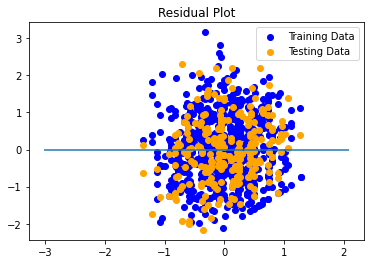

In [11]:
# Linear Regression Plot
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [12]:
# Find the R2 Score
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
r2 = model.score(X_test_scaled, y_test_scaled)

In [13]:
print(f"R2: {r2}")

R2: 0.1149799376816133


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Create Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X,y)

<ipython-input-16-46487eda0809>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(X, y)


0.262

In [17]:
# Sort Importances
importances = rf.feature_importances_
importances

array([0.0410889 , 0.0384181 , 0.06155784, 0.06774464, 0.07950359,
       0.07184675, 0.06044229, 0.07210452, 0.06440565, 0.07020292,
       0.05069068, 0.07726244, 0.0752822 , 0.04552167, 0.04497672,
       0.03832256, 0.04062853])

In [18]:
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.07950358913636255, 'ethnicity_group C'),
 (0.07726243870921168, 'parent_edu_some college'),
 (0.07528220191863844, 'parent_edu_some high school'),
 (0.07210451823376263, "parent_edu_associate's degree"),
 (0.07184674742833079, 'ethnicity_group D'),
 (0.07020292069177647, 'parent_edu_high school'),
 (0.06774464101945292, 'ethnicity_group B'),
 (0.06440565314061047, "parent_edu_bachelor's degree"),
 (0.06155783810642618, 'ethnicity_group A'),
 (0.06044228614471657, 'ethnicity_group E'),
 (0.05069067726421352, "parent_edu_master's degree"),
 (0.0455216704706508, 'lunch_free/reduced'),
 (0.04497672354237911, 'lunch_standard'),
 (0.041088904674989706, 'gender_female'),
 (0.04062853132465948, 'test_prep_none'),
 (0.03841810117981452, 'gender_male'),
 (0.03832255701400412, 'test_prep_completed')]

In [19]:
features = sorted(zip(rf.feature_importances_, X), reverse=True)

In [20]:
# Save Importances Into A DataFrame
df = pd.DataFrame(features)
df.head(50)

,0,1
0,0.079504,ethnicity_group C
1,0.077262,parent_edu_some college
2,0.075282,parent_edu_some high school
3,0.072105,parent_edu_associate's degree
4,0.071847,ethnicity_group D
5,0.070203,parent_edu_high school
6,0.067745,ethnicity_group B
7,0.064406,parent_edu_bachelor's degree
8,0.061558,ethnicity_group A
9,0.060442,ethnicity_group E


In [21]:
# Clean DataFrame
df = df.rename(columns = {0:'Importance',
                    1:'Features'})

In [22]:
df

,Importance,Features
0,0.079504,ethnicity_group C
1,0.077262,parent_edu_some college
2,0.075282,parent_edu_some high school
3,0.072105,parent_edu_associate's degree
4,0.071847,ethnicity_group D
5,0.070203,parent_edu_high school
6,0.067745,ethnicity_group B
7,0.064406,parent_edu_bachelor's degree
8,0.061558,ethnicity_group A
9,0.060442,ethnicity_group E
